# Experiments with synthetic data
**Aim: train model that works on realistic synthetic data**

Fixed Parameters:
- radius: 2
- proportion_hemispheres_lesional: 0.9
- proportion_features_abnormal: 0.2
- smooth_lesion: True
- n_subtypes: 25
- use all controls

Parameters to vary:
- n_subs: 200 / 1000
- architecture: 16-16-16 / 40-10-10 ("large" models) / unet ("unet" models)

Experiments:
- 22-09-30_synth_3layer_large
- 22-09-30_synth_3layer
- 22-09-30_synth_unet

TODO:
- finetune model with smaller proportion hemispheres lesional + radius and evaluate on fixed dataset
- some models trained for 200 epochs ("200" models) did not finish training due to timeouts -- might want to retrain them for completeness sake

- set different number of subjects on train + val for synthetic data
- evaluate previous experiments on fixed dataset
- prints for "zscoring data" currently every patient, set to once

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from meld_graph.paths import EXPERIMENT_PATH
import os
#import seaborn as sns
from meld_graph.experiment import Experiment, discover_trained_experiments

Setting EXPERIMENT_PATH to /rds/project/kw350/rds-kw350-meld/experiments_graph/co-spit1
Setting MELD_DATA_PATH to /home/co-spit1/meld_data
Setting BASE_PATH to /home/co-spit1/meld_data
Setting EXPERIMENT_PATH to /home/co-spit1/meld_experiments/co-spit1
Setting FS_SUBJECTS_PATH to /home/co-spit1/meld_data/output/fs_outputs


### define plotting fns

In [2]:
import collections

def flatten(d, parent_key='', sep='_'):
    items = []
    for k, v in d.items():
        new_key = parent_key + sep + k if parent_key else k
        if isinstance(v, collections.MutableMapping):
            items.extend(flatten(v, new_key, sep=sep).items())
        else:
            items.append((new_key, v))
    return dict(items)
            
def plot_scores(exps, score='loss', split='val', ax=None, title_prefix=''):
    # expects exps to be dict
    scores = []
    if ax is None:
        fig, ax = plt.subplots(1,1)
    for n, exp in sorted(exps.items(), key=lambda item: item[0]):
        scores = exp.get_scores(split=split)[score]
        ax.plot(scores.index, scores, label=n)
    ax.set_xlabel('epochs')
    ax.set_ylabel(score)
    ax.set_title(f'{title_prefix} {split} {score}')
    ax.legend()

### load data

In [3]:
model_base_paths = {
    # 3layer - "200" models are trained for 200 epochs
    '3layer': '/rds/project/kw350/rds-kw350-meld/experiments_graph/co-spit1/22-09-30_synth_3layer',
    '3layer_200': '/rds/project/kw350/rds-kw350-meld/experiments_graph/co-spit1/22-09-30_synth_3layer_200',
    # 3layer larger
    '3layer_large': '/rds/project/kw350/rds-kw350-meld/experiments_graph/co-spit1/22-09-30_synth_3layer_large',
    '3layer_large_200': '/rds/project/kw350/rds-kw350-meld/experiments_graph/co-spit1/22-09-30_synth_3layer_large_200',
    # unet
    'unet': '/rds/project/kw350/rds-kw350-meld/experiments_graph/co-spit1/22-09-30_synth_unet',
   
}

# get list of trained experiments
model_paths = {}
for name, path in model_base_paths.items():
    model_paths[name] = discover_trained_experiments(path)
print(model_paths)

# process paths to get nice descriptive model names and load experiments
models_dict = {}
for name, exp_list in model_paths.items():
    name_dict = {}
    for path in exp_list:
        exp_name = path.split('/')[-2]
        if 'nosmooth' in exp_name:
            #filter out nosmooth experiments
            continue
        name_dict[exp_name] = Experiment.from_folder(path)
    models_dict[name] = name_dict
print(models_dict)

Initialised Experiment 22-09-30_synth_3layer/baseline-prop_features0.2/nsub200
Initialised Experiment 22-09-30_synth_3layer/baseline-prop_features0.2/nsub1000
Initialised Experiment 22-09-30_synth_3layer_200/baseline-prop_features0.2/nsub200


{'3layer': ['/rds/project/kw350/rds-kw350-meld/experiments_graph/co-spit1/22-09-30_synth_3layer/baseline-prop_features0.2/nsub200/fold_00', '/rds/project/kw350/rds-kw350-meld/experiments_graph/co-spit1/22-09-30_synth_3layer/baseline-prop_features0.2/nsub1000/fold_00'], '3layer_200': ['/rds/project/kw350/rds-kw350-meld/experiments_graph/co-spit1/22-09-30_synth_3layer_200/baseline-prop_features0.2/nsub200/fold_00'], '3layer_large': ['/rds/project/kw350/rds-kw350-meld/experiments_graph/co-spit1/22-09-30_synth_3layer_large/baseline-prop_features0.2/nsub200/fold_00', '/rds/project/kw350/rds-kw350-meld/experiments_graph/co-spit1/22-09-30_synth_3layer_large/baseline-prop_features0.2/nsub1000/fold_00'], '3layer_large_200': ['/rds/project/kw350/rds-kw350-meld/experiments_graph/co-spit1/22-09-30_synth_3layer_large_200/baseline-prop_features0.2/nsub200/fold_00'], 'unet': ['/rds/project/kw350/rds-kw350-meld/experiments_graph/co-spit1/22-09-30_synth_unet/baseline-prop_features0.2/nsub200/fold_00']}

Initialised Experiment 22-09-30_synth_3layer_large/baseline-prop_features0.2/nsub200
Initialised Experiment 22-09-30_synth_3layer_large/baseline-prop_features0.2/nsub1000
Initialised Experiment 22-09-30_synth_3layer_large_200/baseline-prop_features0.2/nsub200
Initialised Experiment 22-09-30_synth_unet/baseline-prop_features0.2/nsub200


{'3layer': {'nsub200': <meld_graph.experiment.Experiment object at 0x2b360f4bee20>, 'nsub1000': <meld_graph.experiment.Experiment object at 0x2b360f4be910>}, '3layer_200': {'nsub200': <meld_graph.experiment.Experiment object at 0x2b360f4be940>}, '3layer_large': {'nsub200': <meld_graph.experiment.Experiment object at 0x2b360f4bea00>, 'nsub1000': <meld_graph.experiment.Experiment object at 0x2b360f4be970>}, '3layer_large_200': {'nsub200': <meld_graph.experiment.Experiment object at 0x2b360f4be2e0>}, 'unet': {'nsub200': <meld_graph.experiment.Experiment object at 0x2b360f4beb80>}}


In [12]:
# available scores
#models_dict['3layer']['baseline_nosmooth'].get_scores(split='val')

## Plot data

### 3 layer model

/rds/project/kw350/rds-kw350-meld/experiments_graph/co-spit1/22-09-30_synth_3layer_200/baseline-prop_features0.2/nsub200/fold_00
/rds/project/kw350/rds-kw350-meld/experiments_graph/co-spit1/22-09-30_synth_3layer_200/baseline-prop_features0.2/nsub200/fold_00


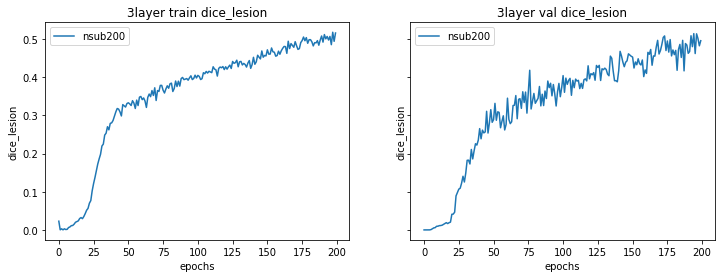

In [5]:
# linear model
fig, axes = plt.subplots(1,2, figsize=(12,4), sharey=True)
plot_scores(models_dict['3layer_200'], 'dice_lesion', split='train', ax=axes[0], title_prefix='3layer')
plot_scores(models_dict['3layer_200'], 'dice_lesion', split='val', ax=axes[1], title_prefix='3layer')


/rds/project/kw350/rds-kw350-meld/experiments_graph/co-spit1/22-09-30_synth_3layer/baseline-prop_features0.2/nsub1000/fold_00
/rds/project/kw350/rds-kw350-meld/experiments_graph/co-spit1/22-09-30_synth_3layer/baseline-prop_features0.2/nsub200/fold_00
/rds/project/kw350/rds-kw350-meld/experiments_graph/co-spit1/22-09-30_synth_3layer/baseline-prop_features0.2/nsub1000/fold_00
/rds/project/kw350/rds-kw350-meld/experiments_graph/co-spit1/22-09-30_synth_3layer/baseline-prop_features0.2/nsub200/fold_00


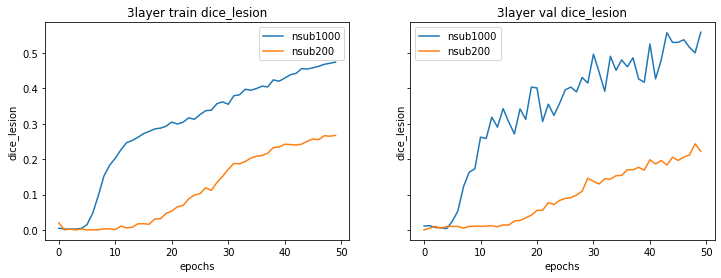

In [6]:
# linear model
fig, axes = plt.subplots(1,2, figsize=(12,4), sharey=True)
plot_scores(models_dict['3layer'], 'dice_lesion', split='train', ax=axes[0], title_prefix='3layer')
plot_scores(models_dict['3layer'], 'dice_lesion', split='val', ax=axes[1], title_prefix='3layer')

### unet model

/rds/project/kw350/rds-kw350-meld/experiments_graph/co-spit1/22-09-30_synth_unet/baseline-prop_features0.2/nsub200/fold_00
/rds/project/kw350/rds-kw350-meld/experiments_graph/co-spit1/22-09-30_synth_unet/baseline-prop_features0.2/nsub200/fold_00


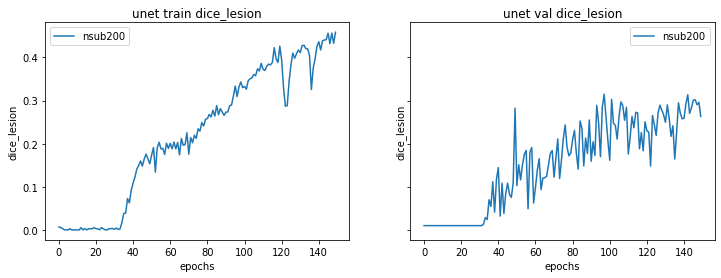

In [7]:
# linear model
fig, axes = plt.subplots(1,2, figsize=(12,4), sharey=True)
plot_scores(models_dict['unet'], 'dice_lesion', split='train', ax=axes[0], title_prefix='unet')
plot_scores(models_dict['unet'], 'dice_lesion', split='val', ax=axes[1], title_prefix='unet')

### larger 3 layer model 

/rds/project/kw350/rds-kw350-meld/experiments_graph/co-spit1/22-09-30_synth_3layer_large/baseline-prop_features0.2/nsub1000/fold_00
/rds/project/kw350/rds-kw350-meld/experiments_graph/co-spit1/22-09-30_synth_3layer_large/baseline-prop_features0.2/nsub200/fold_00
/rds/project/kw350/rds-kw350-meld/experiments_graph/co-spit1/22-09-30_synth_3layer_large/baseline-prop_features0.2/nsub1000/fold_00
/rds/project/kw350/rds-kw350-meld/experiments_graph/co-spit1/22-09-30_synth_3layer_large/baseline-prop_features0.2/nsub200/fold_00


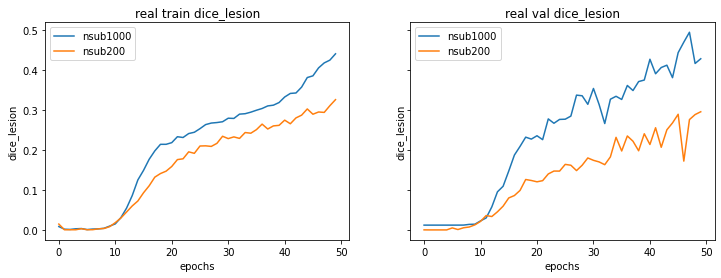

In [9]:
# linear model
fig, axes = plt.subplots(1,2, figsize=(12,4), sharey=True)
plot_scores(models_dict['3layer_large'], 'dice_lesion', split='train', ax=axes[0], title_prefix='real')
plot_scores(models_dict['3layer_large'], 'dice_lesion', split='val', ax=axes[1], title_prefix='real')

/rds/project/kw350/rds-kw350-meld/experiments_graph/co-spit1/22-09-30_synth_3layer_large_200/baseline-prop_features0.2/nsub200/fold_00
/rds/project/kw350/rds-kw350-meld/experiments_graph/co-spit1/22-09-30_synth_3layer_large_200/baseline-prop_features0.2/nsub200/fold_00


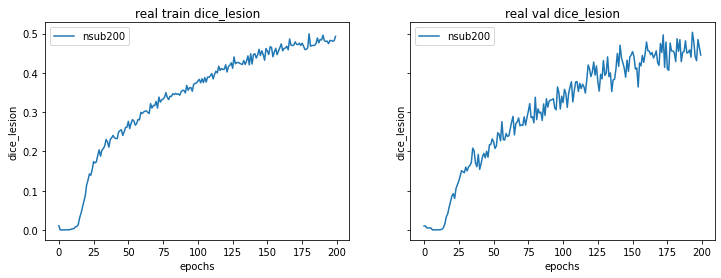

In [10]:
# linear model
fig, axes = plt.subplots(1,2, figsize=(12,4), sharey=True)
plot_scores(models_dict['3layer_large_200'], 'dice_lesion', split='train', ax=axes[0], title_prefix='real')
plot_scores(models_dict['3layer_large_200'], 'dice_lesion', split='val', ax=axes[1], title_prefix='real')